TensorFlow 1.x selected.


Using TensorFlow backend.


x_train.shape=(60000, 28, 28), y_train.shape=(60000,)
x_test.shape=(10000, 28, 28), y_test.shape=(10000,)
5


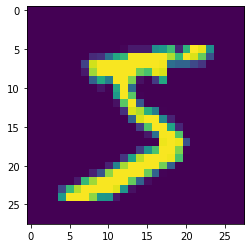

In [1]:
# 使用1.x版本的tensorflow
%tensorflow_version 1.x

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 讀取mnist資料 
# x_train為60000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_train為60000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
# x_test為10000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_test為10000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape={}, y_train.shape={}".format(x_train.shape, y_train.shape))
print("x_test.shape={}, y_test.shape={}".format(x_test.shape, y_test.shape))

# 顯示手寫資料
from matplotlib.pyplot import imshow
imshow(x_train[0])
# print(x_train[0])
print(y_train[0])

In [2]:
# 接著我們必須將x_train及x_test dataset由原本三維轉為四維矩陣以符合CNN的需求
# 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
# MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print("x_train.shape={}".format(x_train.shape))
print("x_test.shape={}".format(x_test.shape))

# 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
# 可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。
x_train = x_train / 255
x_test = x_test / 255

# 手寫數字結果如果採用原來的1, 2, 3....在演算法中，會以為2是1的兩倍大，3是1的三倍大，其實並沒有這個意義
# 因此會採用Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
# 舉例來說，原本y_train[0]=5，經過onehot encoding會變成[0,0,0,0,0,1,0,0,0,0]
print(y_train[0])
y_train = np_utils.to_categorical(y_train)
print(y_train[0])
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

x_train.shape=(60000, 28, 28, 1)
x_test.shape=(10000, 28, 28, 1)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


![alt text](https://4.bp.blogspot.com/-lo4ANmafiQM/WVpEeo68VPI/AAAAAAAAWxE/gVT33Q_dxqMxqZJfnbxS-fxl7ZdsntZcwCEwYBhgL/s1600/3812_1.png)

In [3]:
# CNN模型建置
# filter代表過濾器的數量, kernel_size代表filter的大小
# padding: filter遇到邊緣的處理模式('same'為補0, 'valid'為忽略)
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
______________________________________

batch size的考量

以下是MNIST在LeNet上的測試數據，採用Theano 框架![alt text](https://pic3.zhimg.com/d6fb7abbaeef80e739d824582a0fa384_r.jpg)


1.   Batch_Size 太小，算法在 200 epoches 內不收斂。
2.   隨著 Batch_Size 增大，處理相同數據量的速度越快。
3.   隨著 Batch_Size 增大，達到相同精度所需要的 epoch 數量越來越多。
4.   由於上述兩種因素的矛盾， Batch_Size 增大到某個時候，達到時間上的最優。
5.   由於最終收斂精度會陷入不同的局部極值，因此 Batch_Size 增大到某些時候，達到最終收斂精上的最優。






In [4]:
# 模型編譯
# loss:損失函數 optimizer:學習函數(梯度縮減的方式) metrics:評估模型好壞的方式(accuracy=正確率)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型訓練
# x:訓練資料 y:訓練資料的答案 validation_split:訓練資料的多少百分比要拿來驗證 validation_data:驗證資料 
# epochs:模型訓練次數 
train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)

# 模型評估
scores = model.evaluate(x_test, y_test)
print("模型正確率為：{}".format(scores[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.4479 - accuracy: 0.8688 - val_loss: 0.1178 - val_accuracy: 0.9661
Epoch 2/10
 - 1s - loss: 0.1143 - accuracy: 0.9652 - val_loss: 0.0678 - val_accuracy: 0.9799
Epoch 3/10
 - 1s - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0487 - val_accuracy: 0.9852
Epoch 4/10
 - 1s - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 5/10
 - 1s - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 6/10
 - 1s - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 7/10
 - 1s - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 8/10
 - 1s - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 9/10
 - 1s - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0284 - val_accuracy: 0.9911
Epoch 10/10
 - 1s - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0342 - val_accuracy: 0.9898
10000/10000 [=====

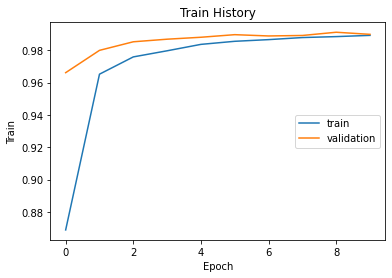

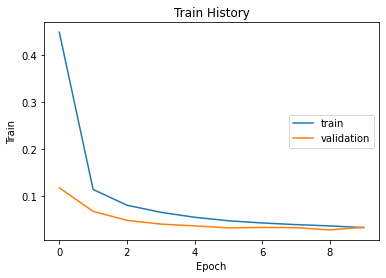

In [5]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')


In [6]:
# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict_classes(x_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,0,1,1
1,0,1126,3,1,0,0,0,1,4,0
2,0,0,1029,1,0,0,0,1,1,0
3,0,0,0,1008,0,1,0,0,1,0
4,0,0,0,0,967,0,0,1,3,11
5,2,0,1,6,0,880,1,0,0,2
6,7,2,1,1,1,7,935,0,4,0
7,0,1,9,3,0,0,0,1007,1,7
8,3,0,2,0,0,1,0,2,963,3


# New Section